# 🐱Cat VS 🐶Dog Image Classification

![cat and dog](https://encrypted-tbn3.gstatic.com/images?q=tbn:ANd9GcQ__is3V2Gsmnxyjv4OH9LeYj7WiVC6Rt0ECfAw13XaSKLRgca6)

## Downloading Images

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:07<00:00, 125MB/s]
100% 1.06G/1.06G [00:07<00:00, 151MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

## Importing Dependencies

In [4]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import *
from keras.preprocessing import image
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import *
from keras.applications.vgg16 import VGG16

import pickle
import cv2
sns.set_style("darkgrid")

## Getting the data

In [24]:
# generators

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

val_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


## Normalizing

In [25]:
def process(image, label):
    image = tf.cast(image/255.,tf.float32)
    return image,label

train_ds = train_ds.map(process)
val_ds = val_ds.map(process)

## Prediction Function

This will help to make prediction on new images

In [26]:
def predict_cnn(test_img):
    test_img = cv2.resize(test_img,(256,256))
    test_input = test_img.reshape((1,256,256,3))
    predictions_cnn = model.predict(test_input)

    if predictions_cnn[0][0] > 0.5:
        print("Prediction: Dog")
    else:
        print("Prediction: Cat")

    plt.imshow(test_img)
    plt.show()



def predict_vgg(test_img):

    test_img = cv2.resize(test_img,(150,150))
    test_input = test_img.reshape((1,150,150,3))

    predictions_vgg = vgg.predict(test_input)

    if predictions_vgg[0][0] > 0.5:
        print("Prediction: Dog")
    else:
        print("Prediction: Cat")

    plt.imshow(test_img)
    plt.show()

# Training a CNN

In [33]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), padding = "valid", activation = "relu", input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2),strides =2, padding = "valid"))


model.add(Conv2D(64,kernel_size = (3,3),padding = 'valid', activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2),strides =2, padding = "valid"))


model.add(Conv2D(128,kernel_size = (3,3),padding = 'valid', activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2),strides =2, padding = "valid"))

model.add(Conv2D(150,kernel_size = (3,3),padding = 'valid', activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2),strides =2, padding = "valid"))

model.add(Conv2D(180,kernel_size = (3,3),padding = 'valid', activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2),strides =2, padding = "valid"))

model.add(Conv2D(250,kernel_size = (3,3),padding = 'valid', activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2),strides =2, padding = "valid"))


model.add(Flatten())

model.add(Dense(128,kernel_initializer = "he_normal",activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(64,kernel_initializer = "he_normal",activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(1,kernel_initializer = "glorot_uniform", activation = "sigmoid"))
model.add(Dropout(0.1))

model.compile(optimizer="adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_12 (Ba  (None, 254, 254, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_13 (Ba  (None, 125, 125, 64)      256       
 tchNormalization)                                               
                                                      

In [36]:
history = model.fit(train_ds,epochs=20,validation_data=val_ds)

Epoch 1/20
625/625 [==============================] - 69s 109ms/step - loss: 1.1820 - accuracy: 0.7686 - val_loss: 0.3935 - val_accuracy: 0.8326
Epoch 2/20
625/625 [==============================] - 70s 112ms/step - loss: 1.1029 - accuracy: 0.8073 - val_loss: 0.4038 - val_accuracy: 0.8172
Epoch 3/20
625/625 [==============================] - 68s 109ms/step - loss: 1.0407 - accuracy: 0.8375 - val_loss: 0.4656 - val_accuracy: 0.7802
Epoch 4/20
625/625 [==============================] - 67s 107ms/step - loss: 1.0808 - accuracy: 0.8223 - val_loss: 0.4236 - val_accuracy: 0.8028
Epoch 5/20
625/625 [==============================] - 70s 111ms/step - loss: 1.0906 - accuracy: 0.8144 - val_loss: 0.3004 - val_accuracy: 0.8734
Epoch 6/20
625/625 [==============================] - 70s 111ms/step - loss: 0.9942 - accuracy: 0.8598 - val_loss: 0.2931 - val_accuracy: 0.8808
Epoch 7/20
625/625 [==============================] - 70s 111ms/step - loss: 1.0228 - accuracy: 0.8617 - val_loss: 0.2853 - val_ac

**Line Plot Overfitting Check**

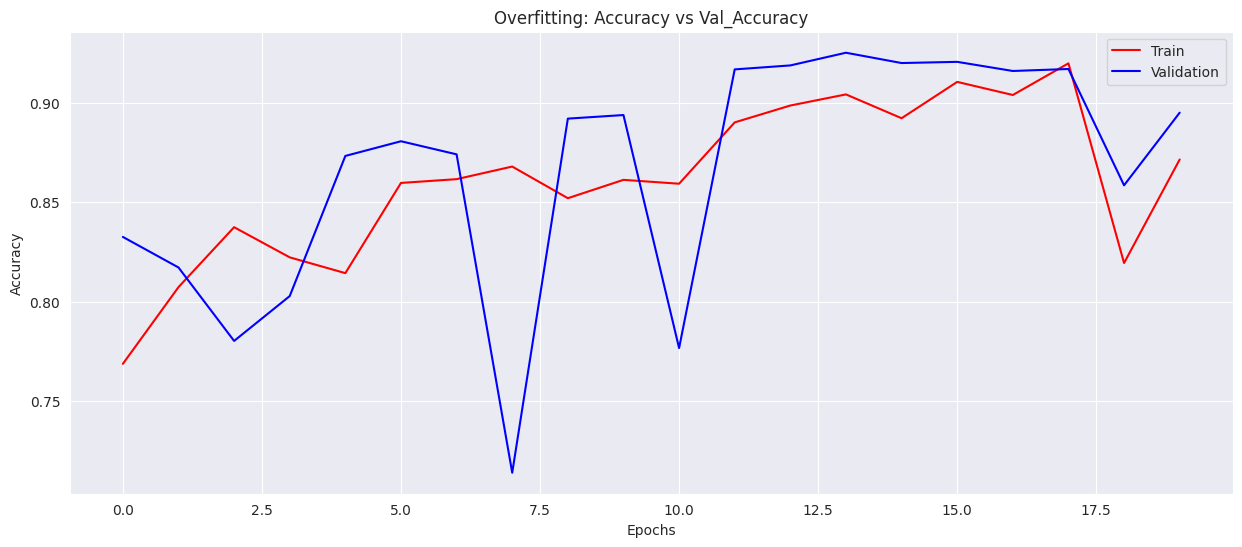

In [37]:
plt.figure(figsize=(15,6))
plt.plot(history.history['accuracy'], color='red', label='Train')
plt.plot(history.history['val_accuracy'], color='blue', label='Validation')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Overfitting: Accuracy vs Val_Accuracy")
plt.legend()
plt.show()

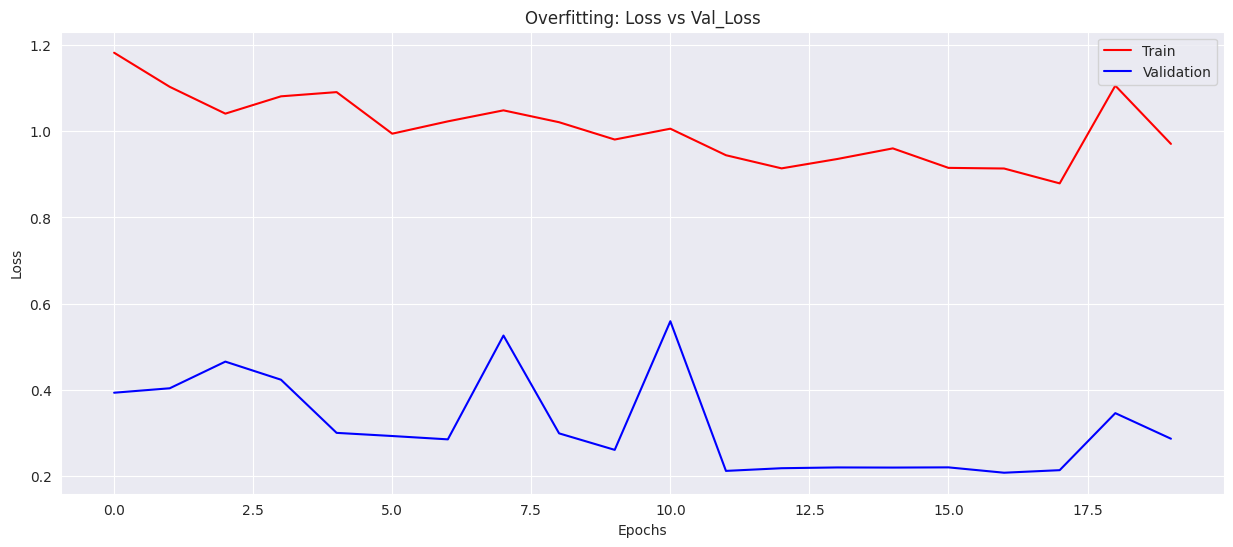

In [38]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'], color='red', label='Train')
plt.plot(history.history['val_loss'], color='blue', label='Validation')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Overfitting: Loss vs Val_Loss")
plt.legend()
plt.show()

1/1 [==============================] - 0s 34ms/step
Prediction: Cat


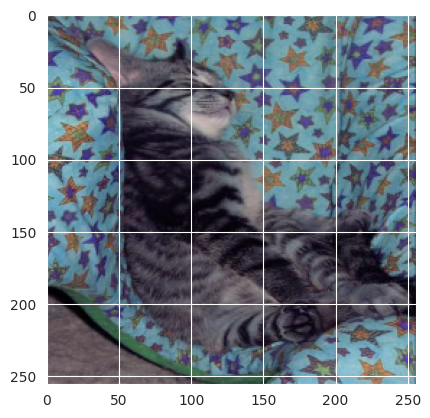

In [41]:
test_img = cv2.imread("/content/test/cats/cat.10026.jpg")
predict_cnn(test_img)

1/1 [==============================] - 0s 19ms/step
Prediction: Dog


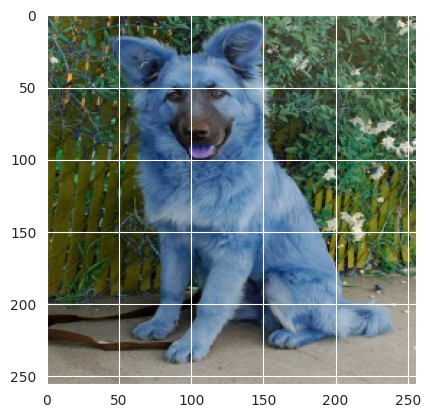

In [42]:
test_img = cv2.imread("/content/test/dogs/dog.10014.jpg")
predict_cnn(test_img)

In [44]:
import pickle

with open('trained_model_cnn.pickle', 'wb') as f:
    pickle.dump(model, f)

model.save('trained_model_cnn.h5')

This is not a perfect model. Let's try Something Else!!!

# Transfer Learning

Using famous VGG16 pretrained Model on ImageNET dataset, preformed well on ILSVRC challenge with the error rate of 7.3%

**Traning VGG16**

In [45]:
conv_base = VGG16(weights = "imagenet",
                 include_top = False,     # removing FC Layers
                 input_shape = (150,150,3)
                 )

58889256/58889256 [==============================] - 0s 0us/step


In [46]:
vgg = Sequential()

vgg.add(conv_base)
vgg.add(Flatten())


vgg.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
vgg.add(Dropout(0.2))
vgg.add(Dense(256, kernel_initializer='he_normal', activation='relu'))
vgg.add(Dropout(0.2))
vgg.add(Dense(128, kernel_initializer='he_normal', activation='relu'))
vgg.add(Dropout(0.2))
vgg.add(Dense(64, kernel_initializer='he_normal', activation='relu'))
vgg.add(Dropout(0.2))
vgg.add(Dense(1, kernel_initializer='glorot_uniform', activation='sigmoid'))


vgg.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_9 (Dense)             (None, 512)               4194816   
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 128)              

In [47]:
conv_base.trainable = False

**Data Augmentation**

In [48]:
batch_size = 32

train_dg = ImageDataGenerator(rescale = 1./255,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True)
test_dg = ImageDataGenerator(rescale = 1./255)

train_gen = train_dg.flow_from_directory('/content/train',
                                        target_size = (150,150),
                                        batch_size = batch_size,
                                        class_mode = "binary")

test_gen = test_dg.flow_from_directory('/content/test',
                                        target_size = (150,150),
                                        batch_size = batch_size,
                                        class_mode = "binary")

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [49]:
vgg.compile(optimizer="adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [50]:
history2 = vgg.fit_generator(train_gen, epochs=20, validation_data = test_gen)

Epoch 1/20
625/625 [==============================] - 167s 259ms/step - loss: 0.3540 - accuracy: 0.8468 - val_loss: 0.2382 - val_accuracy: 0.9028
Epoch 2/20
625/625 [==============================] - 160s 255ms/step - loss: 0.2690 - accuracy: 0.8876 - val_loss: 0.2104 - val_accuracy: 0.9110
Epoch 3/20
625/625 [==============================] - 163s 260ms/step - loss: 0.2463 - accuracy: 0.8978 - val_loss: 0.2066 - val_accuracy: 0.9148
Epoch 4/20
625/625 [==============================] - 160s 255ms/step - loss: 0.2334 - accuracy: 0.9020 - val_loss: 0.2012 - val_accuracy: 0.9150
Epoch 5/20
625/625 [==============================] - 158s 253ms/step - loss: 0.2230 - accuracy: 0.9065 - val_loss: 0.1971 - val_accuracy: 0.9160
Epoch 6/20
625/625 [==============================] - 159s 255ms/step - loss: 0.2186 - accuracy: 0.9116 - val_loss: 0.1970 - val_accuracy: 0.9180
Epoch 7/20
625/625 [==============================] - 160s 256ms/step - loss: 0.2142 - accuracy: 0.9108 - val_loss: 0.2147 -

**Line plot Overfitting check**

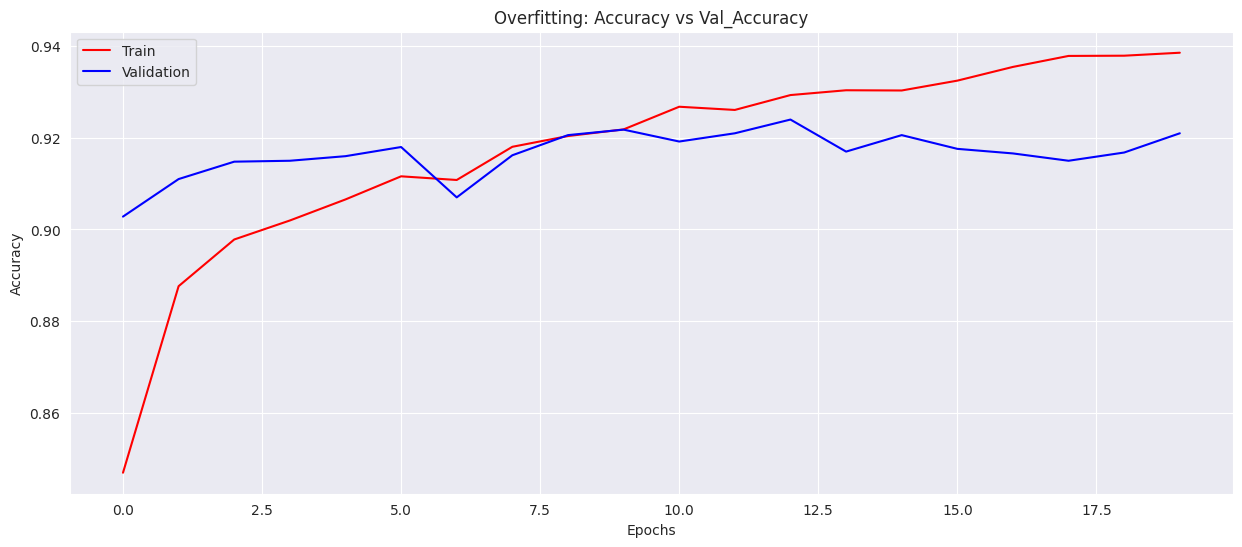

In [51]:
plt.figure(figsize=(15,6))
plt.plot(history2.history['accuracy'], color='red', label='Train')
plt.plot(history2.history['val_accuracy'], color='blue', label='Validation')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Overfitting: Accuracy vs Val_Accuracy")
plt.legend()
plt.show()

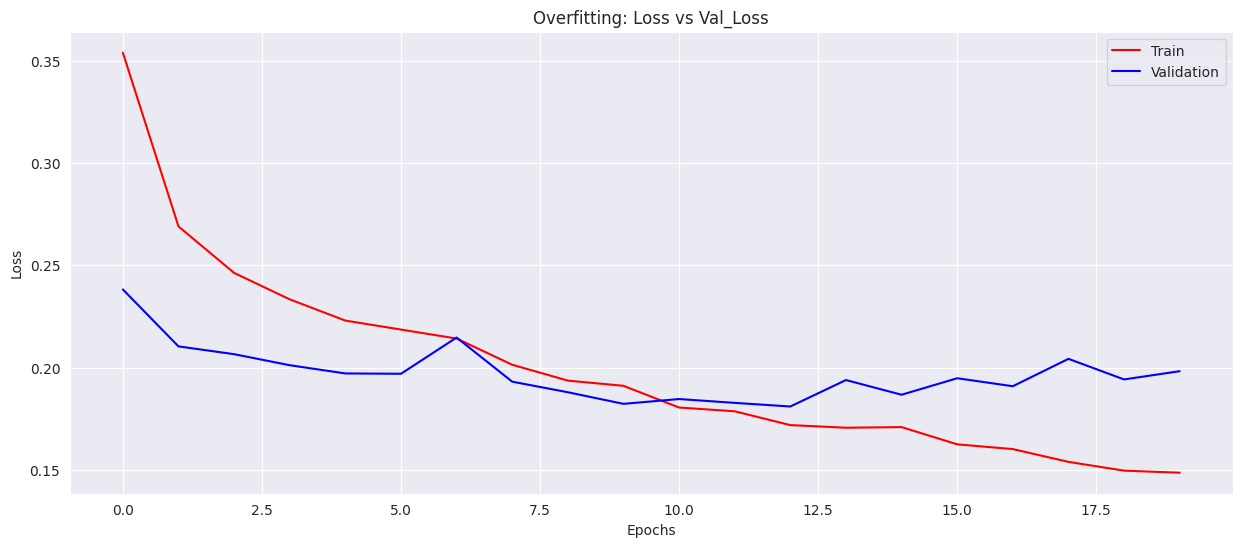

In [52]:
plt.figure(figsize=(15,6))
plt.plot(history2.history['loss'], color='red', label='Train')
plt.plot(history2.history['val_loss'], color='blue', label='Validation')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Overfitting: Loss vs Val_Loss")
plt.legend()
plt.show()

1/1 [==============================] - 1s 741ms/step
Prediction: Cat


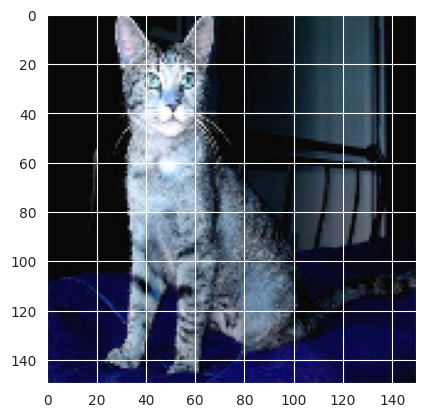

In [53]:
test_img = cv2.imread('/content/test/cats/cat.10000.jpg')  # cat image new data
predict_vgg(test_img)

1/1 [==============================] - 0s 108ms/step
Prediction: Dog


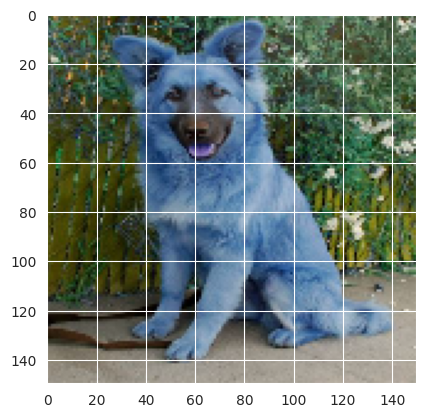

In [54]:
test_img = cv2.imread('/content/test/dogs/dog.10014.jpg')  # dog image new data
predict_vgg(test_img)

In [55]:
with open('trained_model_vgg.pickle', 'wb') as f:
    pickle.dump(vgg, f)

vgg.save('trained_model_vgg.h5')